<a href="https://colab.research.google.com/github/thanhphap059/NguyenThanhPhap19146230/blob/main/3DOF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#BÀI 2: 3DOF
#Tên: Nguyễn Thanh Pháp
#MSSV: 19146230
import math as ma
import pandas as pd
import numpy as np
import csv
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.backend import categorical_crossentropy

In [ ]:
create_data=[]
for i in range(0,180,2):
    array=[]
    for j in range(0,200,2):
        k=180-i-j
        x=50*ma.cos(ma.radians(i))+40*ma.cos(ma.radians(i+j))+30*ma.cos(ma.radians(i+j+k))
        y=50*ma.sin(ma.radians(i))+40*ma.sin(ma.radians(i+j))+30*ma.sin(ma.radians(i+j+k))
        array.append(np.array((i,j,k,x,y)))
    create_data.extend(array)

In [ ]:
header = ['alpha', 'beta', 'sigma' ,'x', 'y']
with open('3DOF1.csv', 'w', encoding='UTF8', newline='') as data_table:
    viet = csv.writer(data_table)
    viet.writerow(header)
    viet.writerows(create_data)

In [ ]:
data=pd.read_csv('3DOF1.csv')
data

,alpha,beta,sigma,x,y
0,0.0,0.0,180.0,60.000000,3.673940e-15
1,0.0,2.0,178.0,59.975633,1.395980e+00
2,0.0,4.0,176.0,59.902562,2.790259e+00
3,0.0,6.0,174.0,59.780876,4.181139e+00
4,0.0,8.0,172.0,59.610723,5.566924e+00
...,...,...,...,...,...
8995,178.0,190.0,-188.0,-40.358819,7.311899e+00
8996,178.0,192.0,-190.0,-40.577231,8.690902e+00
8997,178.0,194.0,-192.0,-40.843637,1.006144e+01
8998,178.0,196.0,-194.0,-41.157712,1.142185e+01


In [ ]:
x_data=np.array(data.drop(['alpha','beta','sigma'],axis=1))
y_data=np.array(data[['alpha','beta','sigma']])
y_data.shape

(9000, 3)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.1)
x_train.shape

(8100, 2)

In [ ]:
model=Sequential()
model.add(Dense(128, activation='relu', input_shape = (2,))) 
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3,  activation='linear'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               384       
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 16)                528       
                                                                 
 dense_16 (Dense)            (None, 8)                 136       
                                                                 
 dense_17 (Dense)            (None, 3)                 27        
                                                                 
Total params: 11,411
Trainable params: 11,411
Non-trai

In [ ]:
model.compile(loss='mse',optimizer=Adam(),metrics=['mean_absolute_error'])
history=model.fit(x_train,y_train,batch_size=2000,epochs=1000,verbose=1, validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=50)]) 

Epoch 1/1000
4/4 [==============================] - 1s 66ms/step - loss: 391.3659 - mean_absolute_error: 12.0620 - val_loss: 544.0361 - val_mean_absolute_error: 17.9270
Epoch 2/1000
4/4 [==============================] - 0s 16ms/step - loss: 363.3080 - mean_absolute_error: 13.7457 - val_loss: 249.4597 - val_mean_absolute_error: 10.0563
Epoch 3/1000
4/4 [==============================] - 0s 17ms/step - loss: 292.4710 - mean_absolute_error: 11.2763 - val_loss: 170.0709 - val_mean_absolute_error: 7.2295
Epoch 4/1000
4/4 [==============================] - 0s 16ms/step - loss: 174.8276 - mean_absolute_error: 8.3775 - val_loss: 225.4827 - val_mean_absolute_error: 10.9304
Epoch 5/1000
4/4 [==============================] - 0s 18ms/step - loss: 186.4974 - mean_absolute_error: 9.3315 - val_loss: 159.6560 - val_mean_absolute_error: 7.3060
Epoch 6/1000
4/4 [==============================] - 0s 19ms/step - loss: 173.4127 - mean_absolute_error: 7.9329 - val_loss: 137.7015 - val_mean_absolute_error:

In [ ]:
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test mae:',score[1])

Test loss: 151.00669860839844
Test mae: 4.701653480529785


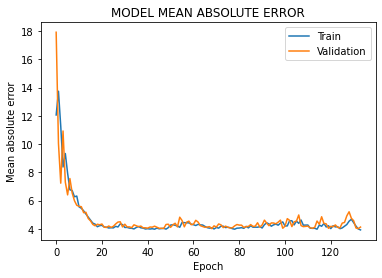

In [ ]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('MODEL MEAN ABSOLUTE ERROR')
plt.ylabel('Mean absolute error')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred[300]

array([ 136.14012,  179.13745, -136.38118], dtype=float32)

In [ ]:
y_test[300]

array([ 124.,  176., -120.])